In [ ]:
# TODO (may want to break this into several code boxes)
print("hello world")

: 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving restaurant_customer_satisfaction.csv to restaurant_customer_satisfaction.csv


In [1]:
# #imports
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('restaurant_customer_satisfaction.csv')
df.head(11)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
5,659,42,Female,28860,Monthly,111.064696,Chinese,Dinner,8,Celebration,Takeaway,0,1,1,26.853298,4,5,3,0
6,660,20,Female,131104,Weekly,120.236707,Indian,Lunch,6,Business,Dine-in,0,0,0,7.927917,5,4,1,0
7,661,51,Female,137882,Weekly,160.979098,Mexican,Dinner,6,Business,Dine-in,1,1,0,56.447210,4,3,3,0
8,662,27,Male,149638,Weekly,56.558632,Indian,Breakfast,5,Celebration,Takeaway,0,1,0,39.568188,2,4,5,0
9,663,32,Female,136145,Weekly,65.753455,Italian,Lunch,9,Casual,Takeaway,0,0,0,20.782469,4,3,1,0


In [2]:
# preparing to clean ....

# Check for missing values and data types in the dataset
def check_missing_values(dataframe):
  columns_missing_data = []
  for column in dataframe.columns:
      if dataframe[column].isnull().sum() > 0:
        columns_missing_data.append(column)
  if columns_missing_data:
    return print("Columns with missing values:", columns_missing_data)
  else:
    return print("There are no columns with missing values in the dataset.")
  return

# determine which values to drop if any (drop if any are 0)
print(df.corr(numeric_only=True)['HighSatisfaction'])

NameError: name 'df' is not defined

In [ ]:
# cleaning/preparing the dataset ...

# renaming specific columns for clarity
df.rename(columns={'Age': 'CustomerAge', 'Income': 'AnnualIncome'}, inplace=True)

# deterimine the lowest and highest ratings to determine range
def summarize_ratings(df, columns):
  rating_summary = {}
  for column in columns:
    min_value = df[column].min()
    max_value = df[column].max()
    rating_summary[column] = {'Lowest Rating': min_value, 'Highest Rating': max_value}
    print(f"{column}: Lowest Rating = {min_value}, Highest Rating = {max_value}")
  return

# turning string data types into binary using one hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False)
encoded_columns = encoder.fit_transform(df[['Gender', 'VisitFrequency',
                                            'PreferredCuisine', 'TimeOfVisit',
                                            'DiningOccasion', 'MealType']])
encoded_df = pd.DataFrame(encoded_columns, columns = encoder.get_feature_names_out
                           (['Gender', 'VisitFrequency',
                               'PreferredCuisine', 'TimeOfVisit',
                                'DiningOccasion', 'MealType']))

df = pd.concat([df.drop(columns=['Gender', 'VisitFrequency',
                                              'PreferredCuisine', 'TimeOfVisit',
                                              'DiningOccasion', 'MealType']),
                                                            encoded_df], axis=1)
# CustomerID is merely an identification method
dfCleaned = df.drop(columns = ["CustomerID"])

In [ ]:
dfCleaned.head()

,CustomerAge,AnnualIncome,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,...,VisitFrequency_Weekly,PreferredCuisine_Chinese,PreferredCuisine_Indian,PreferredCuisine_Italian,PreferredCuisine_Mexican,TimeOfVisit_Dinner,TimeOfVisit_Lunch,DiningOccasion_Casual,DiningOccasion_Celebration,MealType_Takeaway
0,35,83380,27.829142,3,0,1,1,43.523929,2,5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19,43623,115.408622,1,0,0,0,57.524294,5,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,83737,106.693771,6,0,1,0,48.682623,3,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,43,96768,43.508508,1,0,0,0,7.552993,4,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55,67937,148.084627,1,0,0,1,37.789041,2,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
check_missing_values(dfCleaned)
print()
rating_columns = ['ServiceRating', 'FoodRating', 'AmbianceRating']
rating_summary = summarize_ratings(dfCleaned, rating_columns)
print()
print(dfCleaned.corr(numeric_only=True)['HighSatisfaction'])

There are no columns with missing values in the dataset.

ServiceRating: Lowest Rating = 1, Highest Rating = 5
FoodRating: Lowest Rating = 1, Highest Rating = 5
AmbianceRating: Lowest Rating = 1, Highest Rating = 5

CustomerAge                   0.035547
AnnualIncome                  0.081905
AverageSpend                  0.052716
GroupSize                    -0.084235
OnlineReservation             0.194380
DeliveryOrder                 0.165537
LoyaltyProgramMember          0.162642
WaitTime                     -0.143939
ServiceRating                 0.089612
FoodRating                    0.138709
AmbianceRating                0.077656
HighSatisfaction              1.000000
Gender_Male                   0.006678
VisitFrequency_Monthly       -0.101203
VisitFrequency_Rarely        -0.105674
VisitFrequency_Weekly         0.170682
PreferredCuisine_Chinese      0.002223
PreferredCuisine_Indian       0.016404
PreferredCuisine_Italian     -0.016864
PreferredCuisine_Mexican     -0.024817
Time

b, 7 points) Try predicting your target variable using a RandomForestClassifier from scikit-learn, with all the other numerical features in the dataset as your features.  You can create a dataframe that includes just your numeric features with df.select_dtypes(include='number'), and drop your target (to-be-predicted) column from your features if you need to with df = df.drop(columns=['target']).  (The suggested dataset should also drop the first 'Unnamed' column - that row number predicts the genre number pretty well in that dataset!)  Use a train-test split with 10% of the data in the test set, and evaluate the accuracy on the test set.

In [ ]:
# TODO
# beginigg training process
target_column = 'HighSatisfaction'
x = dfCleaned.drop(columns=[target_column])  # features
y = dfCleaned[target_column] # targets

# print(x)
# print("hliufhgiuldfhgiulshtgiusr")
# print(y)

#spliting test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 110)
#training a rfc
modelDict = {}
my_rf = RandomForestClassifier(n_estimators = 50, random_state = 110)
my_rf.fit(x_train, y_train)
score = my_rf.score(x_test, y_test)
modelDict['model1'] = score
print(score)

0.86


c, 4 points) Choose one argument to RandomForestClassifier besides n_estimators that you vary to try to improve your classifier's accuracy.  (See documentation here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  Train three different classifiers with different values for this parameter, counting the one you already trained.

In [ ]:
# TODO variation 2
my_rf = RandomForestClassifier(n_estimators=50, max_depth = 1, min_samples_split = 2,
                               min_samples_leaf = 2, max_features = 3, random_state = 110)
my_rf.fit(x_train, y_train)
score = my_rf.score(x_test, y_test)
modelDict['model2'] = score
print(score)

0.8533333333333334


In [ ]:
# TODO variation 3
my_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    bootstrap=False,
    random_state= 110)

my_rf.fit(x_train, y_train)
score = my_rf.score(x_test, y_test)
modelDict['model3'] = score
print(score)

0.8666666666666667


In [ ]:
#determine best model
best_model_name = max(modelDict, key=modelDict.get)  # get key with max val
best_model_score = modelDict[best_model_name]  # get score of max val
print(f"The best model is: {best_model_name} with a score of: {best_model_score}")

The best model is: model3 with a score of: 0.8666666666666667


d, 2 points) Use the *_feature_importances* attribute of the RandomForestClassifier to find the relative importances of all your features in your best model.

In [ ]:
#TODO

my_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    bootstrap=False,
    random_state= 110 )
my_rf.fit(x_train, y_train)
score = my_rf.score(x_test, y_test)
modelDict['model3'] = score
print(score)
print(my_rf.feature_importances_)

0.8666666666666667
[0.07728596 0.09871736 0.10436125 0.06512063 0.04875866 0.03912342
 0.04201347 0.12435003 0.05220309 0.06793631 0.04944288 0.0156811
 0.01550438 0.01688487 0.03151546 0.01165987 0.0135621  0.01186792
 0.01215588 0.01336782 0.012365   0.01215533 0.03426824 0.02969895]


e, up to 8 points EC) In this step, perform some additional analysis of your choice on your dataset, such as looking at correlations, performing statistical tests, or training a different machine learning classifier or regression.  You could also plot data for credit, using scatter plots, bar charts, or other visualizations.  Choose your methods with an eye toward being interesting for step (f).  This step is extra credit.

In [ ]:
# maybe-TODO anything here:  correlations, statistical tests, other machine learning...

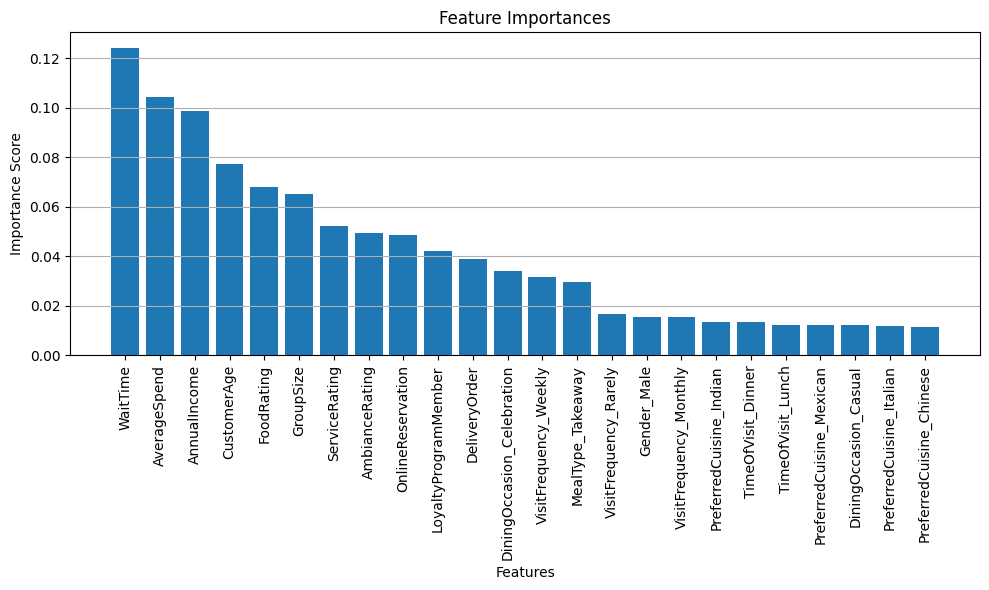

In [ ]:
# ploting how impactful each feature is on the prediciton of the model
feature_importances = my_rf.feature_importances_
features = x.columns
importances = feature_importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# score = my_rf.score(x_test, y_test)
# print(f"Random Forest Model Test Accuracy: {score:.2f}")
# https://matplotlib.org/cheatsheets/

KNN Model Test Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       128
           1       0.00      0.00      0.00        22

    accuracy                           0.84       150
   macro avg       0.43      0.49      0.46       150
weighted avg       0.73      0.84      0.78       150



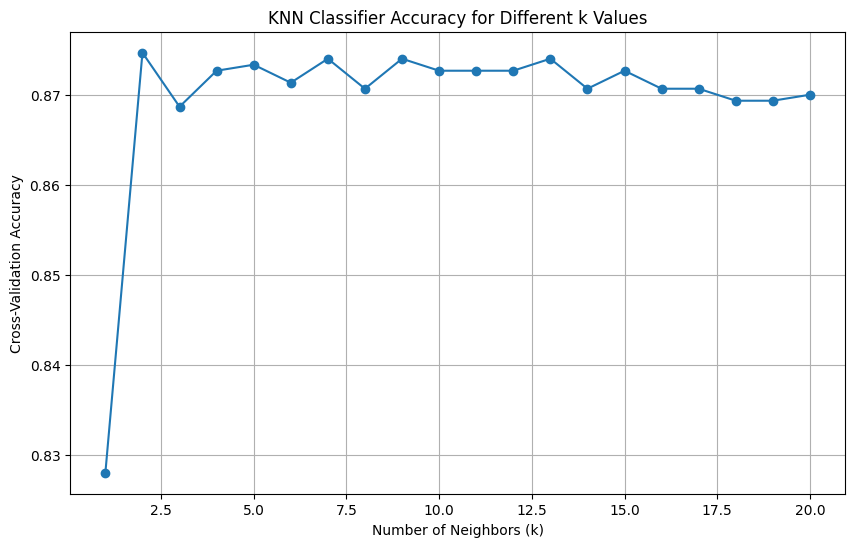

In [ ]:
# Load dataset
# https://scikit-learn.org/1.5/modules/neighbors.html
target_column = 'HighSatisfaction'
x = dfCleaned.drop(columns=[target_column])  # features
y = dfCleaned[target_column]  # targets
# https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
# https://scikit-learn.org/1.5/modules/neighbors.html#
# https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# Standardize features... gemini helped me with this
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=110)
# tyrain KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("KNN Model Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# cross-validation to find the best value for k
k_values = list(range(1, 21))
cv_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, x_scaled, y, cv=5)
    mean_score = scores.mean()
    cv_scores.append(mean_score)
# graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.grid(True)
plt.show()

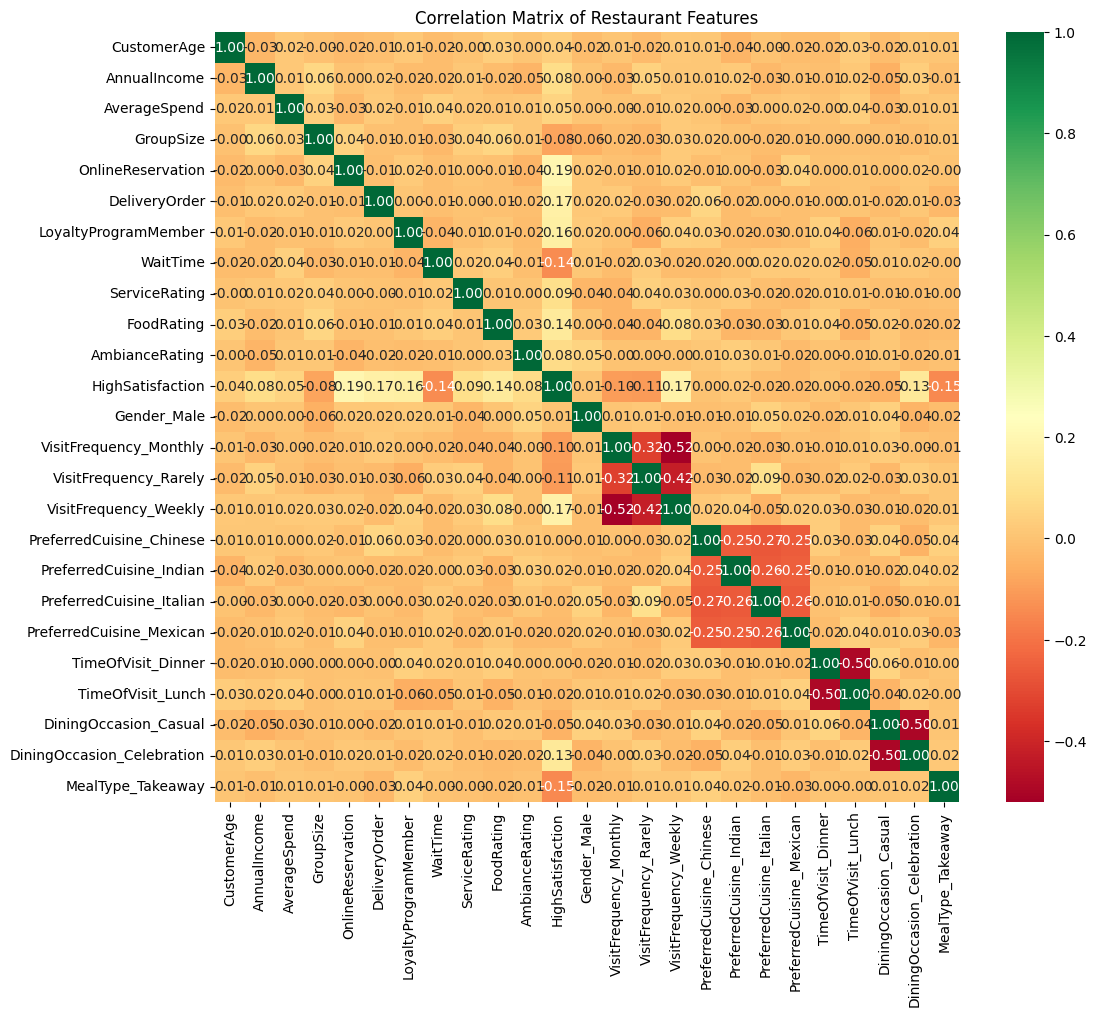

In [ ]:
correlation_matrix = dfCleaned.corr(numeric_only=True)
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Correlation Matrix of Restaurant Features")
plt.show()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# used gemini to help with syntax

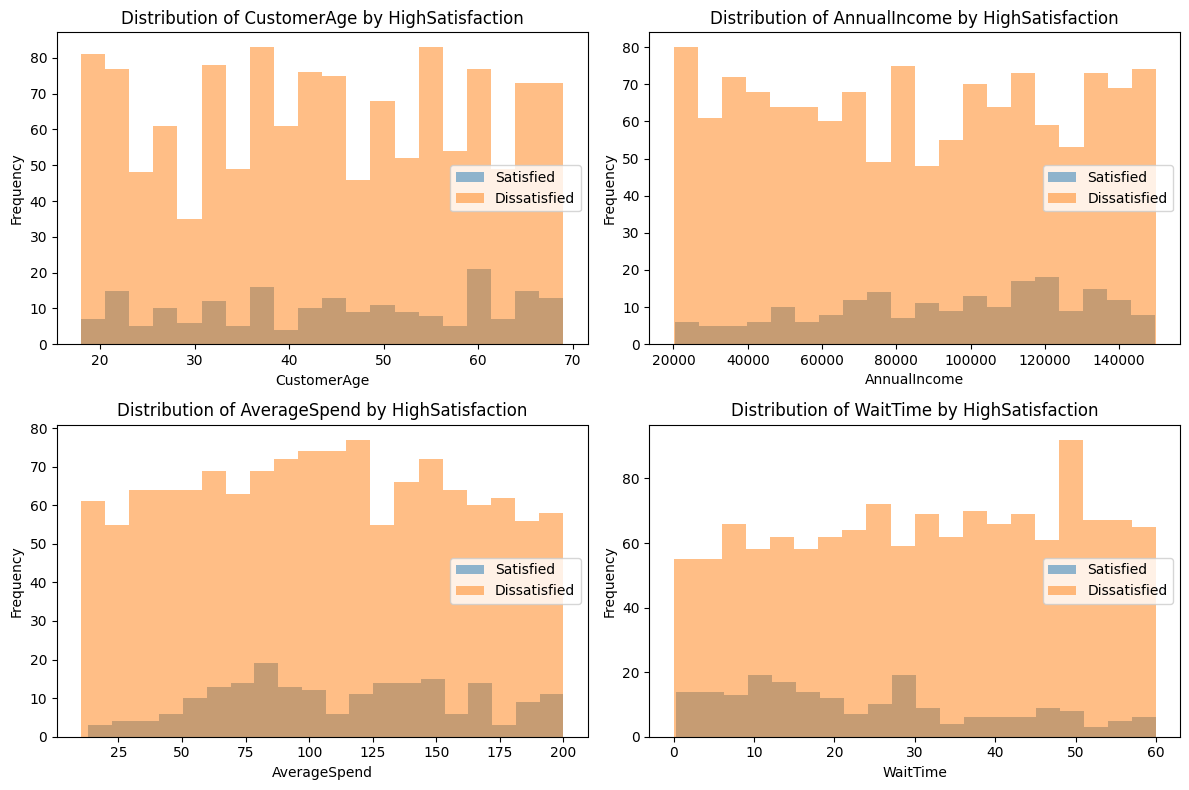

In [ ]:
# https://matplotlib.org/cheatsheets/
selected_cols = ['CustomerAge', 'AnnualIncome', 'AverageSpend', 'WaitTime']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(selected_cols):
    # separate data for satisfied and dissatisfied customers
    satisfied_data = dfCleaned[dfCleaned['HighSatisfaction'] == 1][col]
    dissatisfied_data = dfCleaned[dfCleaned['HighSatisfaction'] == 0][col]
    axes[i].hist(satisfied_data, bins=20, alpha=0.5, label='Satisfied')
    axes[i].hist(dissatisfied_data, bins=20, alpha=0.5, label='Dissatisfied')
    axes[i].set_title(f"Distribution of {col} by HighSatisfaction")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend(loc='center right')
plt.tight_layout()
plt.show()

f, 2 points plus shot at lightning talk) Look over your findings from parts (a-e) and summarize anything interesting you learned about the data from doing this study.  The students with the best answers to this question (who also chose to analyze novel datasets) may be selected to give lightning talks for additional extra credit.

**TODO**

Key Findings from the Analysis

**Data Cleaning and Preparation:**

Check For Missing Values: I checked for missing values in the dataset to ensure data completeness. This is important as missing data can cause problems in predictions. I wrote a function that can help me check for missing data as it would be impossible for a human to actually go through everything.

**Features:**

I used one hot encoding for categorical variables like Gender, VisitFrequency, PreferredCuisine and etc to ensure that the model can handle non-numerical data types.

**Organizing Data/Clarity:**

I renamed columns such as Age to CustomerAge and Income to AnnualIncome for better clarity and understanding since just age can mean anything like age of human or age of resturant or age of staff. Income could also be vague such as Income weekly or income monthly or yearly. I beleive it is better to be clear and persise.

**Correlation Analysis:**

I used correlation to understand which features had the most impact on HighSatisfaction. It was also used for the sake of finding out if anything was completley uncrrelated to HighestSatosfaction. I was looking for anything that had correlation = 0 so I can delete it from my model. I learned from lecutre that memory and runtime is important so I wanted to get rid of anything that wasn't gonna help my model predict better anyways.


**Random Forest CLassifier:**

I trained multiple versions of the Random Forest Classifier models with different parameter settings. I just kind of tried different parameters with different values until I got the best accuracy that I could. I learned that incrreasing the number of trees doesn't really matter if the depht of the trees were very shallow. As i increased the dephth of my trees, the accuracy got better.

**K-Nearest Neighbors:**

I also used KNN Classifier to predict HighSatisfaction. I came across a lot of weird outputs and errors, but a little searching told me that I had to standardize the features in the model so that the actual distance of the features all were equal. I found the best k values using cross-validation.

Data Visualization:

**Feature Importance graph:**

Features like ServiceRating, FoodRating, and AmbianceRating is show to have the most impact on satisfaction levels. While preference for a specific cuisine and gender had nearly no impact on satisfactoon rating Being able to sort the graph from high to low is helpful in the case we want to present to a larger audience.

**KNN Classifer Accuracy for Different K Values:**

This graph is simply for the understanding on how the k variable affects the accuracy of the model. As the number of neighbors increased we can see the data converge to about 87 percnet.

**Correlation Matrix of Resturant Features Heatmap:**

I also used a correlation heatmap to visually show how different features relate to each other and to satisfaction levels. This visually demonstrates key correlations between the features not only to level of satosfaction, but also to other features. This can give further insights such as if we know that food rating is positivley correlated with HighSatisfaction we can see that food rating is most negativly correlated with lunch time. Therefore if the resturant wanted to improve their satifactions one way was to target the quality of their dishes served during lunch. There is also other irrelevant data such as ambience rating being negativley correlated with Delivery Orders which makes no sense.

**Income and Age Analysis:**

By plotting the histograms for CustomerAge and AnnualIncome, we ccan analyse our consumer base which can play a role into the deveolpment of new dishes since we want to cater to a large group of people. If the frequency of older consumers rating a low satiosfaction we can maybe see the correlation between the time of dining and age and see wheather or not we can make new dishes or better our service at certain times. Overall this can provide targeted insights for improving services based on consumer base demographic data.

Impact of Cuisine Preferences: This is mainly the restaurant decide where to focus its menu efforts. However it has little effect on predictions made by the model.


**RFC and KNN Model Comparisons:**

Random forest performed better compared to KNN, likely because random forest is better at handling more complex, non-linear relationships and high-dimensional data.

KNN was used as a simple, understandable model, and while it provided decent results, it wasn't as accurate as Random Forest, potentially due to the higher dimensionality of the one-hot encoded features and the complexity of the various customer data.


**Business Implications:**

The feature importance and customer segment analysis could be very useful for the restaurant to improve customer satisfaction.
A feature importance plot was created to show which features were most influential in predicting HighSatisfaction. Such as customers are more likely to be satisfied when they place orders online. This can mean many thngs such as that the buisness needs to further invest on their online presence or it could mean that the wait time/staff isn't the greatest.

Understanding feature importance helps us make better buissness desisions such as improving workflows in order to diminish wait time or demonstrating that we should cater to larger groups and even improving our menu to cater to a younger or older population.

**Improvement:**

Since ServiceRating and WaitTime was likely a highly influential feature, focusing on improving service standards could lead to a noticeable increase in overall satisfaction.

**Targeted Marketing Strategies:**

Understanding which age groups or income levels tend to have higher or lower satisfaction could help the restaurant tailor its marketing strategies and offers.

**Relection:**

The reason why I chose a resturant data set was because my family owns one and I've worked there for many many years. As an operations manager for the resturant, I feel like this experience of taking a dataset and organizing it and making predicitons off of it could be really helpful for my future endevors. Over winter break I intend on collecting consumer data and analysing it myself to make better desisions for my family buissness.

I learned that I don't know enough statictics to acctually conduct further anaysis. I learned that a big part of being a data scientist or software engineer is documentation, its nearly impossible to fully remember everything by heart and having documentation up is a great way to not have to go do a google search every time I don't remeber syntax.

I learned a little bit on how to use seaborn to create data visuals for a broader audience.

I also learned something about datasets. My chosen dataset wasn't exaclty the messiest or dirtiest, but it had a couple irrelevent columns that needed to be removed (cleaning).

I also learned that the quality of the data set actually has a massive impact on yourt analysis.In hindsight I wish I could have searched for a bigger dataset from another site instead of kaggle. With my dataset being only around 1500 to 2000 points. Its enough to run machine learning classifiers on, but its not enough to do any further feature development. Often times parameters showed no impact on the accuracy score. I beleive its partially due to the limited amount of data I had avalible. Regardless I managed to get a model with 87 percent accuracy. In general this is alright, but I wished I could have gotten it up to around the 90s.

Overall, this was a fun and challenging project and its one that will sit close to home with me.